In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = datasets.load_boston()

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [3]:
data_df = pd.DataFrame(data.data,columns=data.feature_names)
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
x_train = data_df[["DIS","AGE"]].values
sorted(x_train[:,0])[0]

1.1296

In [5]:
y_train = data.target

### M = (X.T * X)^-1 * (X.T * Y)

In [6]:
M = np.matmul(inv(np.matmul(x_train.T,x_train)), np.matmul(x_train.T,y_train))
M

array([3.23345916, 0.1364118 ])

Text(0.5, 0, 'Price')

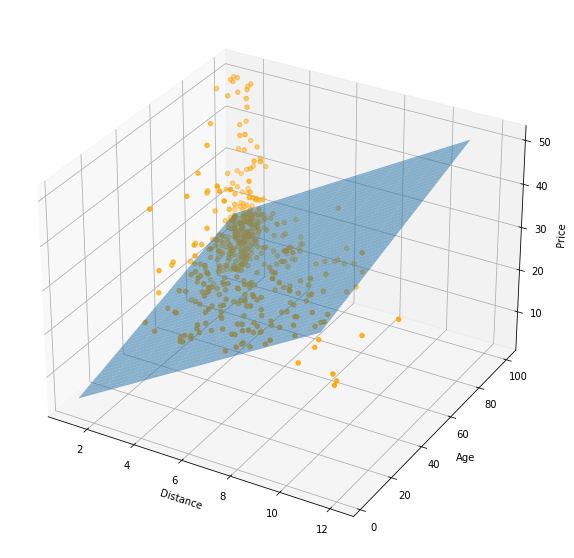

In [7]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection="3d")
ax.scatter(x_train[:,0],x_train[:,1],y_train,c="orange")
X = np.arange(x_train[:,0].min(),x_train[:,0].max())
Y = np.arange(x_train[:,1].min(),x_train[:,1].max())
X, Y = np.meshgrid(X, Y)
Z = X * M[0]  + Y * M[1]
surf = ax.plot_surface(X, Y, Z,alpha=0.5)
ax.set_xlabel("Distance")
ax.set_ylabel("Age")
ax.set_zlabel("Price")